In [55]:
import pandas as pd 
import numpy as np 

In [56]:
from sklearn.datasets import load_breast_cancer

In [59]:
cancer = load_breast_cancer()

In [61]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [62]:
X = cancer ["data"]
y = cancer [ "target"]

In [63]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

#### Standard Scaler 

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
stdscaler = StandardScaler()

In [66]:
X = stdscaler.fit_transform (X)

In [67]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## dataframe

In [68]:
df = pd.DataFrame(data = X, columns= data["feature_names"])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# PCA

In [70]:
X.shape

(569, 30)

In [107]:
from sklearn.decomposition import PCA

In [183]:
pca = PCA(n_components= 6)

In [184]:
X_pca = pca.fit_transform(X)

In [185]:
X_pca.shape

(569, 6)

In [186]:
X_pca

array([[ 9.19283683,  1.94858308, -1.12316613,  3.63373068, -1.19510966,
         1.41142768],
       [ 2.3878018 , -3.76817175, -0.52929271,  1.118264  ,  0.62177469,
         0.0286551 ],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208274, -0.17708577,
         0.54145227],
       ...,
       [ 1.25617928, -1.90229672,  0.56273053, -2.08922693,  1.80999145,
        -0.53444921],
       [10.37479406,  1.6720101 , -1.8770293 , -2.35603099, -0.03374118,
         0.56793094],
       [-5.4752433 , -0.6706368 ,  1.49044311, -2.299157  , -0.18470271,
         1.61783247]])

### plot them 

In [187]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Second Pricinpal Component')

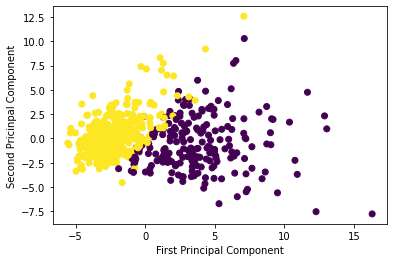

In [188]:
plt.scatter(x= X_pca[:,0], y= X_pca[:,1], c = y,  cmap= "viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Pricinpal Component")

### can we prove this ??? 
lets try SVC 

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [192]:
svc = SVC()

#### none pca

In [193]:

svc.fit(X_train, y_train)

SVC()

In [194]:
y_pred_orig = svc.predict(X_test)

In [195]:
print( classification_report(y_test, y_pred_orig))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [196]:
svc.score(X_test,y_test)

0.9707602339181286

#### pca 

In [197]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [198]:
svc_pca = SVC()

In [199]:
svc_pca.fit(X_train_pca,y_train)

SVC()

In [200]:
y_pred_pca = svc_pca.predict(X_test_pca)

In [201]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [202]:
svc_pca.score(X_test_pca, y_test)

0.9766081871345029

#### PCA was slightly better at 6 components, but need this can be changed

In [203]:
### NB we want to get the scores the same

## Lets check  the variances where the number of pca components (n_componets) = number of features

In [207]:
pca = PCA(n_components= 30)

In [209]:
pca.fit(X,y)

PCA(n_components=30)

Text(0.5, 0, 'number of components')

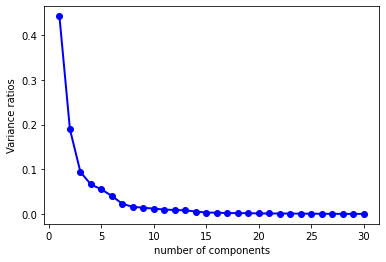

In [211]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.ylabel("Variance ratios")
plt.xlabel("number of components")